<a href="https://colab.research.google.com/github/tompollard/tableone/blob/master/tableone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating the `polartableone` package

In research papers, it is common for the first table ("Table 1") to display summary statistics of the study data. The `polartableone` package is used to create this table from a `polars` dataframe. For an introduction to basic statistical reporting in biomedical journals, we recommend reading the [SAMPL Guidelines](http://www.equator-network.org/wp-content/uploads/2013/07/SAMPL-Guidelines-6-27-13.pdf). For more reading on accurate reporting in health research, visit the [EQUATOR Network](http://www.equator-network.org/).

This introductory notebook was taken directly from https://github.com/tompollard/tableone/blob/main/tableone.ipynb and then modified to use `polars` and the `polartableone` rather than `pandas` and `tableone`.

If you happen to be using polars, but prefer `tableone`, you can convert your dataframe to `pandas` first (`df.to_pandas()`), and then use `tableone` normally.

Differences with `tableone`:
* Use of `great_tables` to display nicer tables.
* In some cases, use of `polars` operations rather than `numpy` (or `pandas`).
* Automatic determination of nonnormal columns and will display q1, median, q3 (whereas `tableone` defaults to showing `mean` even in these cases)

## Contents

Set up:

- [Suggested citation](#citation)
- [Installation](#installation)

Example usage:

- [Creating a simple Table 1](#simple-example)
- [Creating a stratified Table 1](#stratified-example)
- [Adding p-values and standardized mean differences](#pval-smd)
- [Using a custom hypothesis test to calculate P-Values](#custom-htest)

Exporting the table:

- [Exporting to LaTex, Markdown, HTML etc](#export)

## A note for users of `polarstableone`

While the authors of the original `tableone` have tried to use best practices in creating their package (from which this one is inspired), automation of even basic statistical tasks can be unsound if done without supervision. Use of `polartableone` should be done alongside other methods of descriptive statistics and, in particular, visualization to ensure appropriate data handling.

It is beyond the scope of our documentation to provide detailed guidance on summary statistics, but as a primer we provide some considerations for choosing parameters when creating a summary table at: http://tableone.readthedocs.io/en/latest/bestpractice.html. 

*Guidance should be sought from a statistician when using `polartableone` for a research study, especially prior to submitting the study for publication*.

## Suggested citation <a name="citation"></a>
If you use `polartableone` in your study, please cite this repository.

## Installation <a name="installation"></a>

To install the package with pip, run the following command in your terminal: `pip install polartableone`. For more detailed installation instructions, refer to the [documentation](https://polartableone.readthedocs.io/en/latest/install.html).

## Importing libraries

Before using the `polartableone` package, we need to import it. We will also import `polars` for loading our sample dataset and `matplotlib` and `seaborn` for creating plots.

In [1]:
# Import numerical libraries
import numpy as np
from scipy import stats
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys

sys.path.append('src')

In [3]:
# Import tableone
from polartableone import TableOne

## Loading sample data

We begin by loading the data that we would like to summarize into a Pandas DataFrame. 
- Variables are in columns
- Encounters/observations are in rows.

In [4]:
# Load PhysioNet 2012 sample data
data = pl.read_csv('tests/datasets/pn2012.csv')

In [5]:
data.head()

Age,SysABP,Height,Weight,ICU,MechVent,LOS,death
i64,f64,f64,f64,str,i64,i64,i64
54,null,null,null,"""SICU""",0,5,0
76,105.0,175.3,80.6,"""CSRU""",1,8,0
44,148.0,null,56.7,"""MICU""",0,19,0
68,null,180.3,84.6,"""MICU""",0,9,0
88,null,null,null,"""MICU""",0,4,0


## Example 1: Simple summary of data with Table 1 <a name="simple-example"></a>

In this example we provide summary statistics across all of the data.

In [6]:
TableOne(data)

In [7]:
# Create a simple Table 1 with no grouping variable
# Test for normality, multimodality (Hartigan's Dip Test), and far outliers (Tukey's test)
table1 = TableOne(data, dip_test=True, normal_test=True, tukey_test=True, show_histograms=True)
table1

In [8]:
# View Table 1 (note the remarks below the table)
table1.show()

Table 1 
 
 
 
 Level 
 Missing 
 Overall 
 
 
 
 
 
 n 
 
 
 1000 
 
 
 
 Age, median [Q1,Q3] 
 
 0 
 68.0 [53.0,79.0] 
 370 0 35 18 43 67 98 125 126 152 165 171 
 
 
 SysABP, median [Q1,Q3] 
 
 291 
 119.0 [102.0,137.0] 
 370 0 51 0 2 14 85 198 187 118 34 20 
 
 
 Height, median [Q1,Q3] 
 
 475 
 170.2 [160.0,177.8] 
 370 0 10 8 87 73 67 88 103 66 13 10 
 
 
 Weight, median [Q1,Q3] 
 
 302 
 80.0 [66.1,96.0] 
 370 0 39 101 132 147 106 61 58 22 16 16 
 
 
 ICU, n (%) 
 CCU 
 
 162 (16.2) 
 
 
 
 ICU, n (%) 
 CSRU 
 
 202 (20.2) 
 
 
 
 ICU, n (%) 
 MICU 
 
 380 (38.0) 
 
 
 
 ICU, n (%) 
 SICU 
 
 256 (25.6) 
 
 
 
 MechVent, n (%) 
 0 
 
 540 (54.0) 
 
 
 
 MechVent, n (%) 
 1 
 
 460 (46.0) 
 
 
 
 LOS, median [Q1,Q3] 
 
 0 
 10.0 [6.0,17.0] 
 370 0 283 370 163 84 40 23 11 8 4 14 
 
 
 death, n (%) 
 0 
 
 864 (86.4) 
 
 
 
 death, n (%) 
 1 
 
 136 (13.6) 
 
 
 
 
 
 
 Variables with non-normal distributions (p < 0.05): Age, SysABP, Height, Weight, LOS 
 


 
 Variables with far outliers (Tukey, 3×IQR): Height, Weight, LOS

In [9]:
# The ld.DataFrame object can be accessed using the `tableone` attribute
type(table1._table)

polars.dataframe.frame.DataFrame

**Summary of the table**:
- the first row ('`n`') displays a count of the encounters/observations in the input data.
- the '`Missing`' column displays a count of the null values for the particular variable.
- if categorical variables are not defined in the arguments, they are detected automatically.
- continuous variables (e.g. '`age`') are summarized by '`mean (std)`'.
- categorical variables (e.g. '`ascites`') are summarized by '`n (% of non-null values)`'.
- if `label_suffix=True`, "mean (SD); n (%);" etc are appended to the row label.

## Exploring the warning raised by Hartigan's Dip Test

Hartigan's Dip Test is a test for multimodality. The test has suggested that the `Age`, `SysABP`, and `Height` distributions may be multimodal. We'll plot the distributions here.

(-30.0, 250.0)

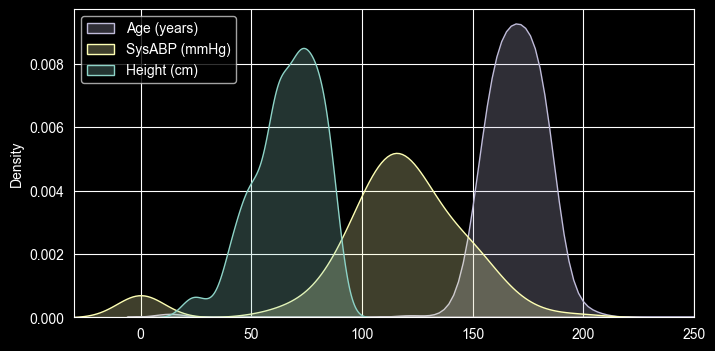

In [10]:
plt.figure(figsize=[8, 4])
sns.kdeplot(data.select('Age', 'SysABP', 'Height').drop_nulls(), fill=True)
plt.legend(['Age (years)', 'SysABP (mmHg)', 'Height (cm)'])
plt.xlim([-30, 250])

## Exploring the warning raised by Tukey's rule

Tukey's rule has found far outliers in Height, so we'll look at this in a boxplot

([<matplotlib.axis.XTick at 0x169c4449f90>,
 [Text(0, 0, 'Age (years)'),
  Text(1, 0, 'SysABP (mmHg)'),
  Text(2, 0, 'Height (cm)')])

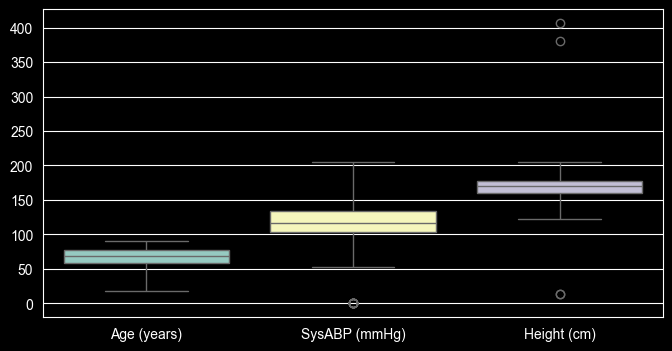

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(data.select('Age', 'SysABP', 'Height').drop_nulls(), whis=3)
plt.xticks(ticks=[0, 1, 2], labels=['Age (years)', 'SysABP (mmHg)', 'Height (cm)'])

In both cases it seems that there are values that may need to be taken into account when calculating the summary statistics. For `SysABP`, a clearly bimodal distribution, the researcher will need to decide how to handle the peak at ~0, perhaps by cleaning the data and/or describing the issue in the summary table. For `Height`, the researcher may choose to report median, rather than mean.

## Example 2: Table 1 with stratification <a name="stratified-example"></a>

In this example we provide summary statistics across all of the data, specifying columns, categorical variables, and non-normal variables.

In [12]:
# columns to summarize
columns = ['Age', 'SysABP', 'Height', 'Weight', 'ICU', 'death']

# columns containing categorical variables
categorical = ['ICU']

# columns containing categorical variables
continuous = ['Age', 'SysABP', 'Height', 'Weight']

# non-normal variables
nonnormal = ['Age']

# limit the binary variable "death" to a single row
limit = {"death": 1}

# set the order of the categorical variables
order = {"ICU": ["MICU", "SICU", "CSRU", "CCU"]}

# set decimal places for age to 0
decimals = {"Age": 0}

# optionally, a categorical variable for stratification
groupby = 'death'

# rename the death column
labels = {'death': 'Mortality'}

# display minimum and maximum for listed variables
min_max = ['Height']

table2 = TableOne(data, columns=columns, categorical=categorical, continuous=continuous,
                  groupby=groupby, nonnormal=nonnormal, rename=labels, label_suffix=True,
                  decimals=decimals, limit=limit, min_max=min_max,
                  dip_test=True, normal_test=True, tukey_test=True)

table2

**Summary of the table**:

- variables are explicitly defined in the input arguments.
- the variables are displayed in the same order as the `columns` argument.
- the `limit` argument specifies that only a 1 value should be shown for death.
- the order of categorical values is defined in the optional `order` argument.
- `nonnormal` continuous variables are summarized by '`median [Q1,Q3]`' instead of `mean (SD)`.
- 'sex' is shown as 'gender and 'trt' is shown as 'treatment', as specified in the `rename` argument.
- data is summarized across the groups specified in the `groupby` argument.
- `min_max` displays \[minimum, maximum\] for the variable, instead of standard deviation or upper/lower quartiles.

## Adding p-values and standardized mean differences <a name="pval-smd"></a>

- We can run a test to compute p values by setting the ``pval`` argument to True. 
- Pairwise standardized mean differences can be added with the ``smd`` argument.

In [13]:
# create grouped_table with p values
table3 = TableOne(data, columns, categorical, continuous, groupby, nonnormal, pval=True, smd=True,
                  htest_name=True, dip_test=True, normal_test=True, tukey_test=True)
table3

**Summary of the table**:
- the `htest_name` argument can be used to display the name of the hypothesis tests used.
- the '`p-value`' column displays the p value generated to 3 decimal places.

## Using a custom hypothesis test to compute P-Values <a name="custom-htest"></a>

Custom hypothesis tests can be defined using the `htest` argument, which takes a dictionary of variable: function pairs (i.e. `htest = {var: custom_func}`, where `var` is the variable and `custom_func` is a function that takes lists of values in each group. The custom function must return a single `pval` value.

In [14]:
# define the custom tests
# `*` allows the function to take an unknown number of arguments
def my_custom_test(group1, group2):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    my_custom_test.__name__ = "Custom test 1"
    _, pval = stats.ks_2samp(group1, group2)
    return pval


# If the number of groups is unknown, use *args
def my_custom_test2(*args):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    # uncomment the following chunk to view the first 10 values in each group
    for n, a in enumerate(args):
        print("Group {} (total {} values.): {} ...".format(n, len(a), a[:10]))

    my_custom_test2.__name__ = "Custom test 2"
    _, pval = stats.ks_2samp(*args)
    return pval


custom_tests = {'Age': my_custom_test, 'SysABP': my_custom_test2}

In [15]:
# create the table
table4 = TableOne(data, groupby="death", pval=True, htest_name=True, htest=custom_tests)
table4

Group 0 (total 608 values.): [105. 148. 150. 205.  98. 115. 119. 145.   0.  94.] ...
Group 1 (total 101 values.): [103. 139. 164. 105.  95.   0. 178. 142.  96. 105.] ...


## Saving the table in custom formats (LaTeX, CSV, Markdown, etc) <a name="export"></a>

Tables can be exported to file in various formats, including:

- LaTeX
- CSV
- HTML

There are two options for exporting content:

1. Print and copy the table using the `tabulate` method
2. Call the relevant `to_<format>()` method on the DataFrame.

### Printing your table using tabulate

The tableone object includes a `tabulate` method, that makes use of the [tabulate](https://pypi.org/project/tabulate/) package to display the table in custom output formats. Supported table formats include: "github", "grid", "fancy_grid", "rst", "html", "latex", and "latex_raw". See the tabulate package for more formats.

To export your table in LaTex (for example, to add to your document on [Overleaf.com](https://www.overleaf.com/)), it's simple with the `tabulate` method. Just copy and paste the output below.

In [16]:
# create the table
table5 = TableOne(data, groupby="death")

In [17]:
print(table5.tabulate(tablefmt='latex'))

\begin{tabular}{llllll}
\hline
                   & Level   & Missing   & Overall      & 0            & 1            \\
\hline
 n                 &         &           & 1000         & 864          & 136          \\
 Age, mean (SD)    &         & 0         & 65.0 (17.2)  & 64.0 (17.4)  & 71.7 (14.0)  \\
 SysABP, mean (SD) &         & 291       & 114.3 (40.2) & 115.4 (38.3) & 107.6 (49.4) \\
 Height, mean (SD) &         & 475       & 170.1 (22.1) & 170.3 (23.2) & 168.5 (11.3) \\
 Weight, mean (SD) &         & 302       & 82.9 (23.8)  & 83.0 (23.6)  & 82.3 (25.4)  \\
 ICU, n (\%)        & CCU     &           & 162 (16.2)   & 137 (15.9)   & 25 (18.4)    \\
 ICU, n (\%)        & CSRU    &           & 202 (20.2)   & 194 (22.5)   & 8 (5.9)      \\
 ICU, n (\%)        & MICU    &           & 380 (38.0)   & 318 (36.8)   & 62 (45.6)    \\
 ICU, n (\%)        & SICU    &           & 256 (25.6)   & 215 (24.9)   & 41 (30.1)    \\
 MechVent, n (\%)   & 0       &           & 540 (54.0)   & 468 (54.2

In [18]:
print(table5.tabulate(tablefmt="github"))

|                   | Level   | Missing   | Overall      | 0            | 1            |
|-------------------|---------|-----------|--------------|--------------|--------------|
| n                 |         |           | 1000         | 864          | 136          |
| Age, mean (SD)    |         | 0         | 65.0 (17.2)  | 64.0 (17.4)  | 71.7 (14.0)  |
| SysABP, mean (SD) |         | 291       | 114.3 (40.2) | 115.4 (38.3) | 107.6 (49.4) |
| Height, mean (SD) |         | 475       | 170.1 (22.1) | 170.3 (23.2) | 168.5 (11.3) |
| Weight, mean (SD) |         | 302       | 82.9 (23.8)  | 83.0 (23.6)  | 82.3 (25.4)  |
| ICU, n (%)        | CCU     |           | 162 (16.2)   | 137 (15.9)   | 25 (18.4)    |
| ICU, n (%)        | CSRU    |           | 202 (20.2)   | 194 (22.5)   | 8 (5.9)      |
| ICU, n (%)        | MICU    |           | 380 (38.0)   | 318 (36.8)   | 62 (45.6)    |
| ICU, n (%)        | SICU    |           | 256 (25.6)   | 215 (24.9)   | 41 (30.1)    |
| MechVent, n (%)   |

### Exporting your table using the `to_<format>()` method

Alternatively, the table can be saved to file using the Pandas `to_format()` method. 

In [19]:
# Save to Excel
fn1 = 'tableone.xlsx'
table5.write_excel(fn1)

# Save table to LaTeX
fn2 = 'tableone.tex'
table5.write_latex(fn2)

# Save table to HTML
fn3 = 'tableone.html'
table5.write_html(fn3)